In [49]:
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

Loading the Megaset that we created by combining all the informations.

In [50]:
df_megaset = pd.read_csv('../../data/megaset.csv')
df_megaset

,Name,Year,Languages,Countries,Genres,Tropes,Budget,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,,1916.0,"silent film, hungarian",hungary,"silent film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!women art revolution,2010.0,english,"united states of america, canada","lgbt, history, documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#1 cheerleader camp,2010.0,NaN,united states of america,"sports, sex comedy, comedy film, comedy, teen",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$,1971.0,english,united states of america,"crime fiction, heist, action/adventure, thrill...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$9.99,2008.0,english,"australia, israel","stop motion, drama, indie, world cinema, anima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
83598,…all the marbles,1981.0,english,united states of america,"drama, comedy-drama, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
83599,…and there wasn’t everafter…,NaN,english,india,short film,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83600,…men olsenbanden var ikke død,1984.0,norwegian,norway,"crime fiction, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
83601,₤500 reward,1918.0,"silent film, english",NaN,silent film,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Basic Analysis on our Megaset

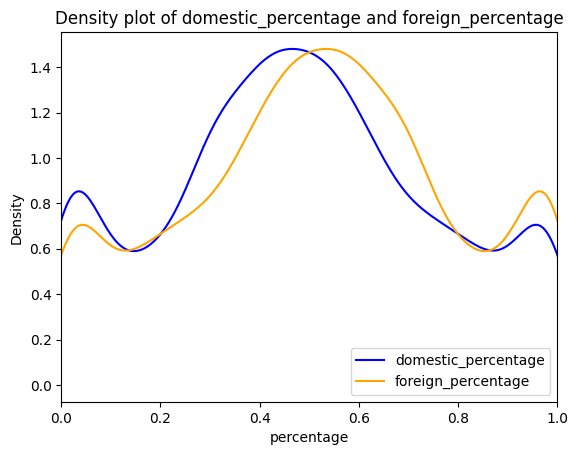

In [51]:
df_copy = df_megaset.copy(deep=True)
df_percentage = df_copy.dropna(subset=['domestic_percentage', 'foreign_percentage'])

#print(df_domestic_percentage.domestic_percentage.min())
#print(df_domestic_percentage.domestic_percentage.max())

df_percentage.domestic_percentage.plot.density(color='blue')
df_percentage.foreign_percentage.plot.density(color='orange')

plt.title('Density plot of domestic_percentage and foreign_percentage')
plt.xlabel('percentage')
plt.xlim(0, 1)
plt.legend(["domestic_percentage", "foreign_percentage"], loc="lower right")
plt.show()

Total number of countries : 146
Number of countries with more than 500 counts : 20


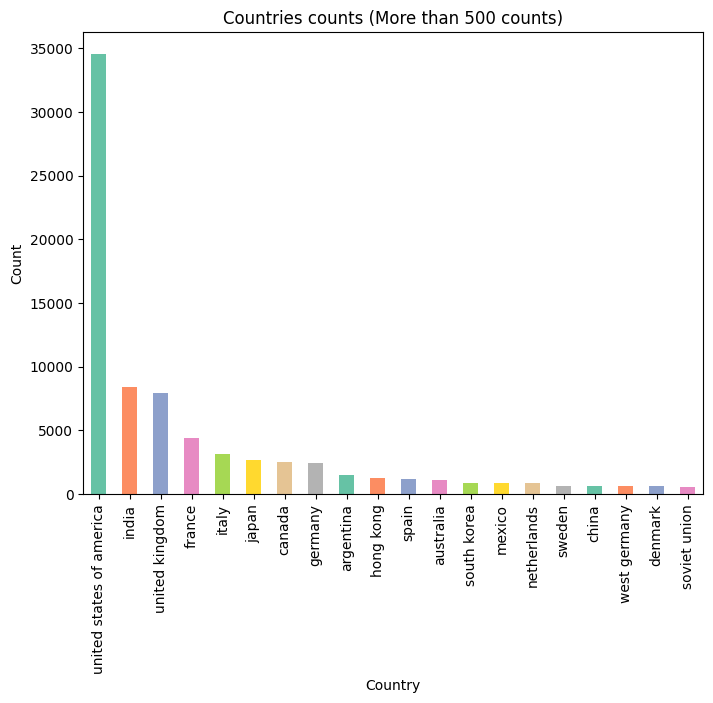

In [52]:
df_countries = df_copy.dropna(subset=['Countries'])
countries_counts = df_countries['Countries'].str.split(', ').explode().value_counts()
print(f"Total number of countries : {len(countries_counts)}")

count_threshold = 500
filt_countries_count = countries_counts[countries_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_countries_count)}")
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
filt_countries_count.plot(kind='bar', color=colors)
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

This plot shows that the dataset contains a lot more data on the United States. Therefore our analysis will be more US based.

In [53]:
df_copy = df_megaset.copy(deep=True)
df_years = df_copy.dropna(subset=['Year'])
print(df_years['Year'].max())
#df_years = df_years[df_years['Countries'].str.contains('united states', na=False)]
years_count = df_years['Year'].explode().value_counts().sort_values()
print(years_count)
#print(f"Total number of years : {len(years_count)}")

#count_threshold = 1
#df_years_count = years_count[years_count > count_threshold]
#print(len(df_years_count))
#print(f"Counts of Years")
#colors = sns.color_palette("Set2", len(filt_countries_count))
#plt.figure(figsize=(8, 6))
#df_years_count.plot(kind='bar', color='blue')
#plt.title(f'Countries counts (More than {count_threshold} counts)')
#plt.xlabel("Year")
#plt.ylabel("Count")
#plt.show()

Sep 9, 2016
Year
Apr 6, 2007        1
May 19, 2005       1
Nov 21, 2014       1
Oct 27, 2017       1
May 16, 2002       1
                ... 
2005.0          2107
2009.0          2252
2007.0          2393
2006.0          2447
2008.0          2470
Name: count, Length: 811, dtype: int64


# Genre Preference

Preferences in genre in US vs World for american movies (rank genres based on foreign revenues vs domestic revenues)

# Trope Preference

Preferences in TV tropes in US vs World for american movies (rank tropes based on foreign revenues vs domestic revenues)

# Proportion of Domestic vs Foreign gross for US movies

domestic vs foreign income, total and percentage, for american movies over time

In [54]:
year_min = df_megaset['Year'].min()
year_max = df_megaset['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")

TypeError: '<=' not supported between instances of 'str' and 'float'

In [55]:
df_gross = df_megaset.drop(columns=['Budget', 'Languages', 'Genres', 'Tropes'])
df_gross = df_gross[df_gross['Countries'].str.contains('united states', na=False)]
df_gross = df_gross.dropna()
df_gross

,Name,Year,Countries,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
25,(500) days of summer,2009.0,united states of america,32425665.0,0.941537,2013395.0,0.058463,34439060.0
91,10 things i hate about you,1999.0,united states of america,38177966.0,0.631940,22235984.0,0.368060,60413950.0
147,10th & wolf,2006.0,united states of america,54702.0,0.380451,89080.0,0.619549,143782.0
156,11-11-11,2011.0,"united states of america, spain",32800.0,0.005721,5700000.0,0.994279,5732800.0
169,12 rounds,2009.0,united states of america,12234694.0,0.706936,5071954.0,0.293064,17306648.0
...,...,...,...,...,...,...,...,...
83360,zodiac,2007.0,united states of america,33080084.0,0.398171,50000000.0,0.601829,83080084.0
83405,zombieland,2009.0,united states of america,75590286.0,0.739366,26646310.0,0.260634,102236596.0
83424,zookeeper,2011.0,united states of america,80360866.0,0.470482,90444659.0,0.529518,170805525.0
83425,zoolander,2001.0,"united states of america, australia, germany",45172250.0,0.743197,15608731.0,0.256803,60780981.0


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

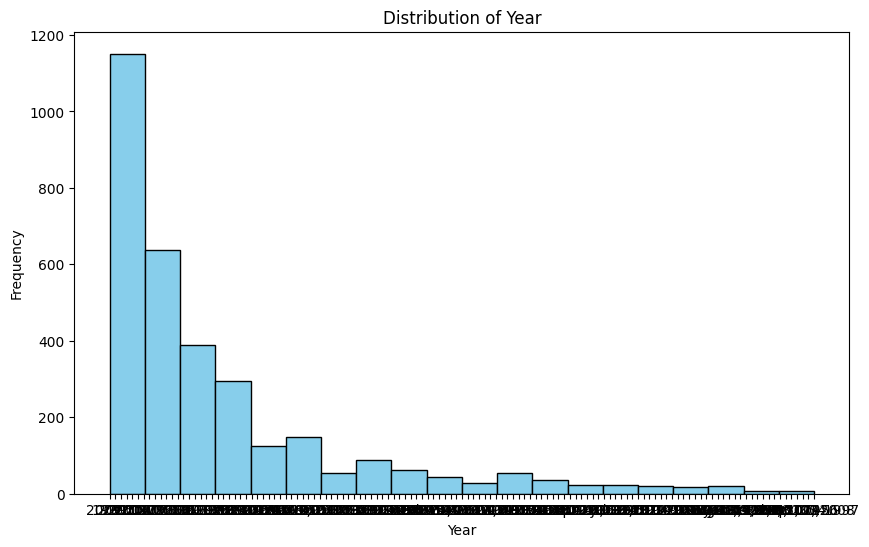

In [56]:
# Plot the histogram for the 'Year' column
plt.figure(figsize=(10, 6))
plt.hist(df_gross['Year'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid

In [ ]:
year_min = df_gross['Year'].min()
year_max = df_gross['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")


The range of the 'Year' column is: 1980.0 to 2017.0


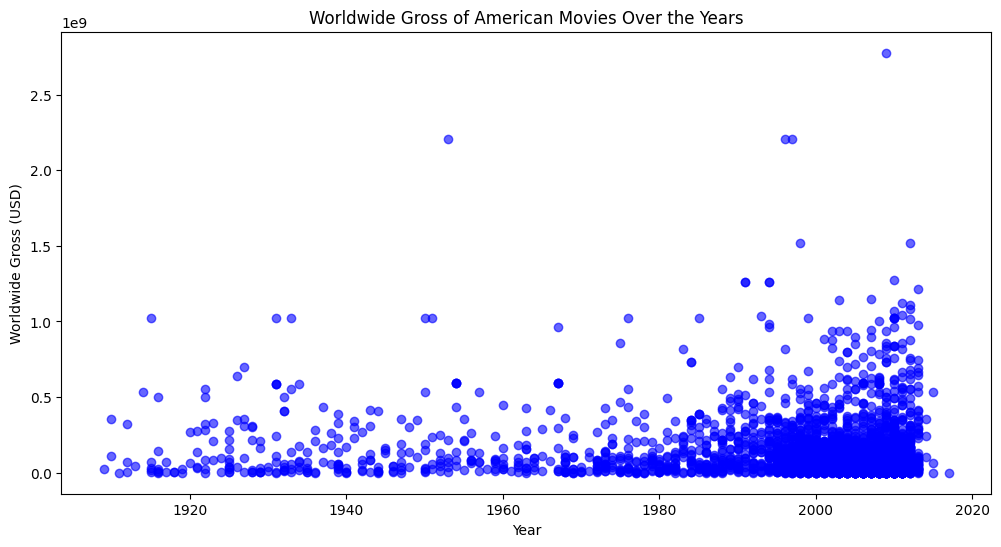

In [ ]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_gross['Year'], df_gross['worldwide_gross'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies Over the Years')

# Show the plot
plt.show()

In [ ]:
## FILTER FOR years above 1980
df_gross = df_gross[(df_gross['Year'] > 1999)&(df_gross['Year'] < 2017)]

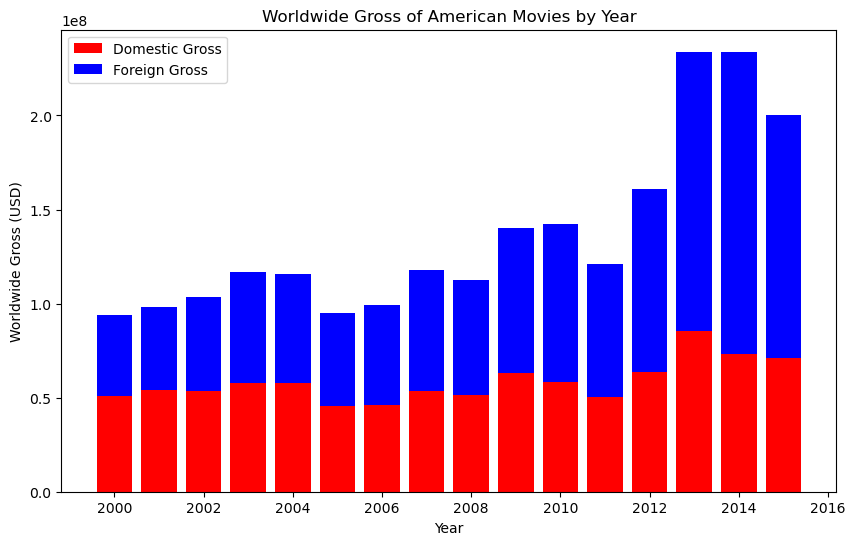

In [ ]:
# First, group the data by 'Year' and calculate the sum for each year
yearly_data = df_gross.groupby('Year')[['domestic_gross', 'foreign_gross']].mean()

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['domestic_gross'], color='red', label='Domestic Gross')
plt.bar(yearly_data.index, yearly_data['foreign_gross'], bottom=yearly_data['domestic_gross'], color='blue', label='Foreign Gross')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies by Year')
plt.legend()

# Display the plot
plt.show()

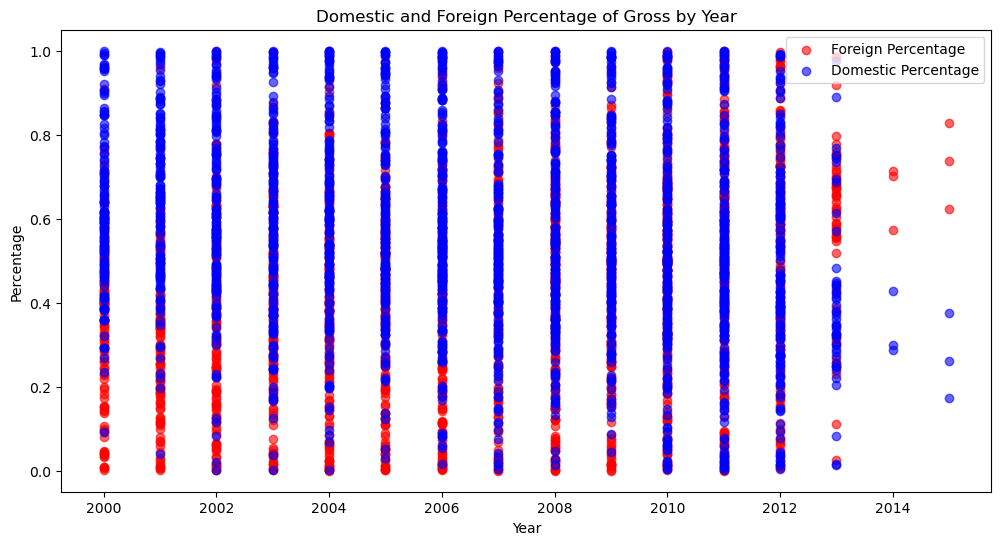

In [ ]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot foreign_percentage in red
plt.scatter(df_gross['Year'], df_gross['foreign_percentage'], color='red', label='Foreign Percentage', alpha=0.6)

# Plot domestic_percentage in blue
plt.scatter(df_gross['Year'], df_gross['domestic_percentage'], color='blue', label='Domestic Percentage', alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()

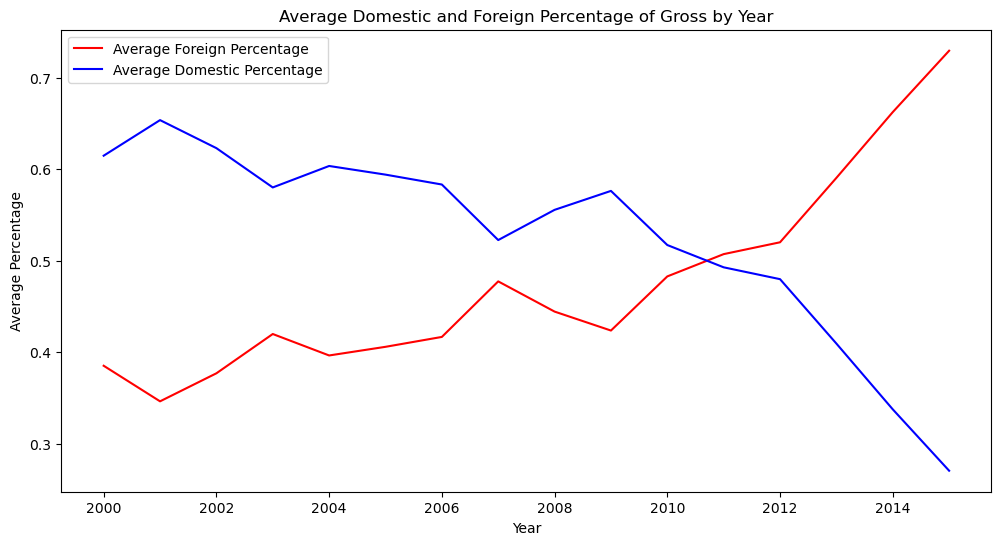

In [ ]:
# Calculate the average foreign and domestic percentages for each year
average_percentages = df_gross.groupby('Year')[['foreign_percentage', 'domestic_percentage']].mean()

# Plot the averages
plt.figure(figsize=(12, 6))

# Plot foreign_percentage as a red line
plt.plot(average_percentages.index, average_percentages['foreign_percentage'], color='red', label='Average Foreign Percentage')

# Plot domestic_percentage as a blue line
plt.plot(average_percentages.index, average_percentages['domestic_percentage'], color='blue', label='Average Domestic Percentage')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.title('Average Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()

# Budget Influence

budget vs foreign and domestic income for american movies

In [ ]:
def remove_high_val(x):
    x = float(x)
    if x > 1:
        return False
    return True

initial length of the dataset: 85120
Length after removing all the Nans: 5058
-----------------------------------------------
Pearson coeff on budget and domestic
PearsonRResult(statistic=-0.2297677034823198, pvalue=1.3793496184732962e-61)
Pearson coeff on budget and foreign
PearsonRResult(statistic=0.22976770348231984, pvalue=1.3793496184732962e-61)


,Name,Budget,domestic_percentage,foreign_percentage
26,(500) days of summer,7500000.0,0.941537,0.058463
81,10 cloverfield lane,5000000.0,0.665670,0.334330
94,10 things i hate about you,13000000.0,0.631940,0.368060
99,"10,000 b.c.",105000000.0,0.352272,0.647728
152,10th & wolf,8000000.0,0.380451,0.619549


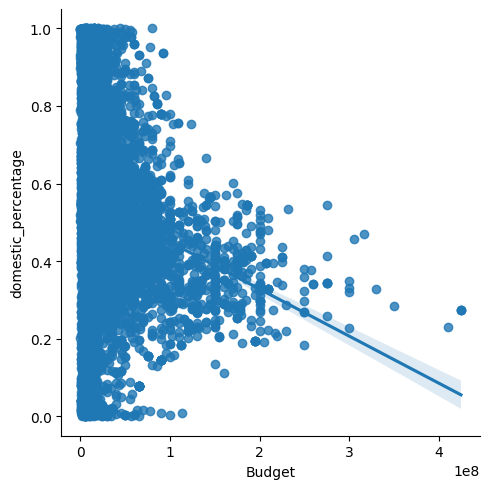

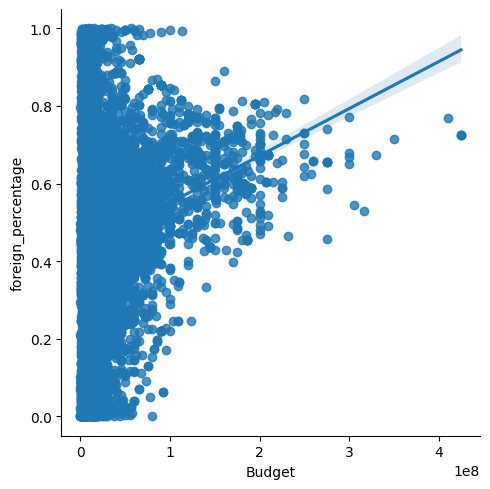

In [ ]:
import seaborn as sn
from statsmodels.stats import diagnostic
from scipy import stats

df_meg_copy = df_megaset.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget', 'domestic_percentage', 'foreign_percentage']]

print(f"initial length of the dataset: {len(df_meg_copy)}")

df_meg_copy = df_meg_copy[df_meg_copy['Budget'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['domestic_percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['foreign_percentage'].notna()]

print(f"Length after removing all the Nans: {len(df_meg_copy)}")
print("-----------------------------------------------")
df_meg_copy = df_meg_copy[df_meg_copy.foreign_percentage < 1]
#print(len(ind))
#df_meg_copy.foreign_percentage = df_meg_copy.foreign_percentage.apply(lambda x: remove_special_character(x))

sn.lmplot(x='Budget',y='domestic_percentage', data=df_meg_copy)

print("Pearson coeff on budget and domestic")
print(stats.pearsonr(df_meg_copy['Budget'],df_meg_copy['domestic_percentage']))

sn.lmplot(x='Budget',y='foreign_percentage', data=df_meg_copy)
print("Pearson coeff on budget and foreign")
print(stats.pearsonr(df_meg_copy['Budget'],df_meg_copy['foreign_percentage']))
df_meg_copy.head()




# Market Changes

⁠let's look for movie industry big numbers internationally - market size for countries over time, is america losing its market share

# Languages ?

More languages = more world audience? for american movies... not gonna give much if it's just american movies